In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv('C:\\Users\\Karan\\Desktop\\Data\\insurance_dataset\\insurance_dataset.csv')
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,None,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,None,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


1. In this data we have over a million observations and 12 columns.
2. The data was previously cleaned with no missing values while the data was getting transferred from sql database to excel file

In [3]:
df.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

In [4]:
cat_cols=['smoker',
 'region',
 'medical_history',
 'family_medical_history',
 'exercise_frequency',
 'occupation',
 'coverage_level']
cat_cols

['smoker',
 'region',
 'medical_history',
 'family_medical_history',
 'exercise_frequency',
 'occupation',
 'coverage_level']

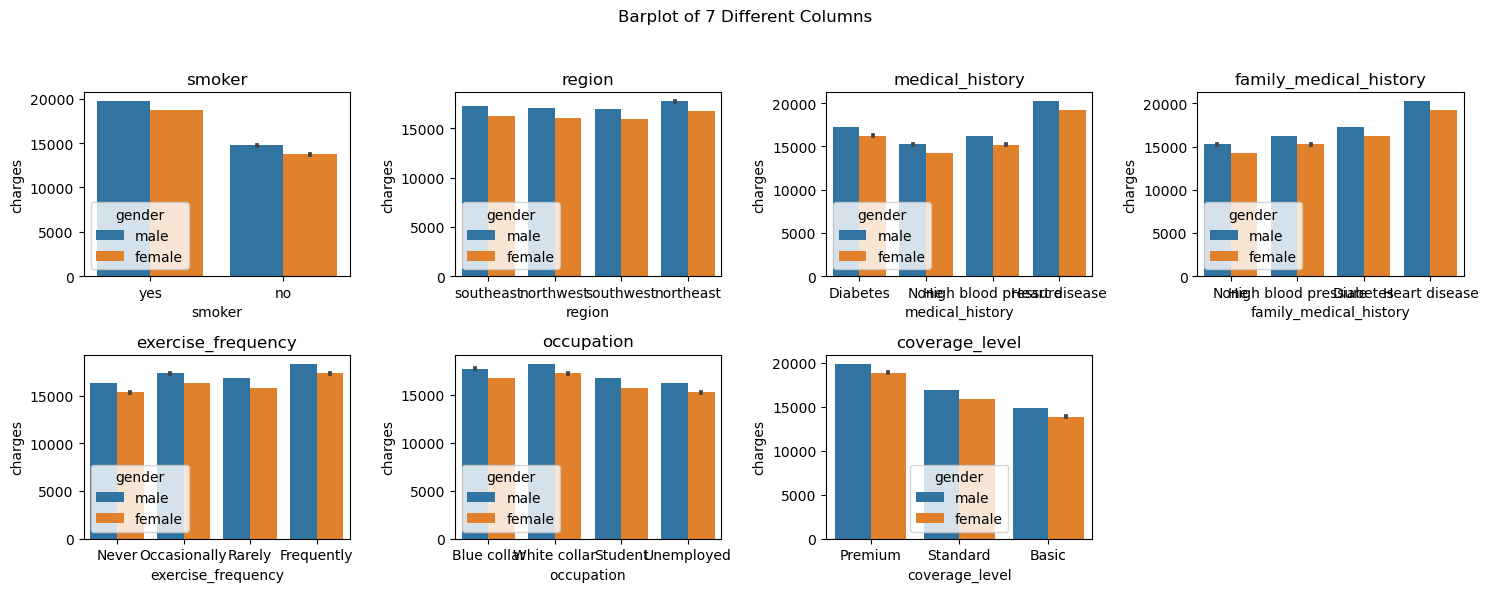

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create subplots dynamically based on the number of columns
n_cols = len(cat_cols)
n_rows = (n_cols - 1) // 4 + 1  # Calculate the number of rows needed
fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(15, 6))
fig.suptitle('Barplot of 7 Different Columns')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Create barplots for each column
for i, col in enumerate(cat_cols):
    sns.barplot(x=df[col], y=df["charges"],hue=df['gender'] ,ax=axes[i])  # Assuming index as x-axis
    axes[i].set_title(f'{col}')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Remove any remaining empty subplots
if n_cols < len(axes):
    for i in range(n_cols, len(axes)):
        fig.delaxes(axes[i])

# Show the plots
plt.show()


In [8]:
cat_cat={}
for i in cat_cols:
    categories=df[i].unique()
    cat_cat[i]=list(categories)
cat_cat

{'gender': ['male', 'female'],
 'smoker': ['yes', 'no'],
 'region': ['southeast', 'northwest', 'southwest', 'northeast'],
 'medical_history': ['Diabetes',
  'None',
  'High blood pressure',
  'Heart disease'],
 'family_medical_history': ['None',
  'High blood pressure',
  'Diabetes',
  'Heart disease'],
 'exercise_frequency': ['Never', 'Occasionally', 'Rarely', 'Frequently'],
 'occupation': ['Blue collar', 'White collar', 'Student', 'Unemployed'],
 'coverage_level': ['Premium', 'Standard', 'Basic']}

In [26]:
cat_cat

{'gender': ['male', 'female'],
 'smoker': ['yes', 'no'],
 'region': ['southeast', 'northwest', 'southwest', 'northeast'],
 'medical_history': ['Diabetes',
  'None',
  'High blood pressure',
  'Heart disease'],
 'family_medical_history': ['None',
  'High blood pressure',
  'Diabetes',
  'Heart disease'],
 'exercise_frequency': ['Never', 'Occasionally', 'Rarely', 'Frequently'],
 'occupation': ['Blue collar', 'White collar', 'Student', 'Unemployed'],
 'coverage_level': ['Premium', 'Standard', 'Basic']}

In [34]:
df.head()
df['bmi'].describe()

count    1000000.000000
mean          34.001839
std            9.231680
min           18.000000
25%           26.020000
50%           34.000000
75%           41.990000
max           50.000000
Name: bmi, dtype: float64

In [42]:
df.isnull().sum()
df['age'].unique()

(48,)

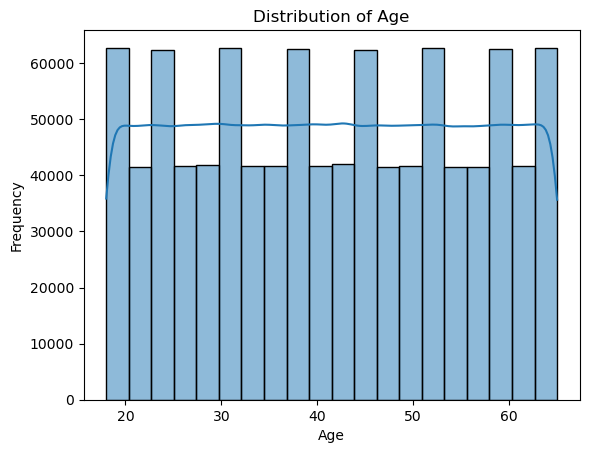

In [46]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

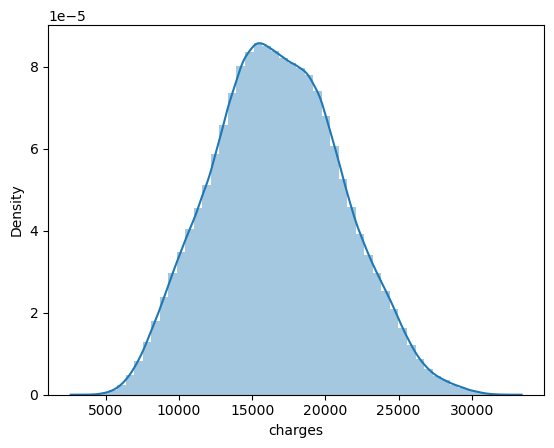

In [35]:
sns.distplot(df['charges']);

In [44]:
df.describe()

,age,bmi,children,charges
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,41.495282,34.001839,2.499886,16735.117481
std,13.855189,9.231680,1.707679,4415.808211
min,18.000000,18.000000,0.000000,3445.011643
25%,29.000000,26.020000,1.000000,13600.372379
50%,41.000000,34.000000,2.000000,16622.127973
75%,53.000000,41.990000,4.000000,19781.465410
max,65.000000,50.000000,5.000000,32561.560374


In [5]:
X=df.drop('charges',axis=1)
y=df['charges']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
num_cols=[]
cat_cols=[]
for columns in df.columns:
    if df[columns].dtype in ['int64','float64']:
        num_cols.append(columns)
    else:
        cat_cols.append(columns)

In [10]:
num_cols.remove('charges')

In [11]:
cat_cols
['gender',
 'smoker',
 'region',
 'medical_history',
 'family_medical_history',
 'exercise_frequency',
 'occupation',
 'coverage_level']
num_cols

['age', 'bmi', 'children']

In [13]:
#Linear Regression with StandardScaler and LabelEncoder
scaler=StandardScaler()
for i in num_cols:
    X_train[i]=scaler.fit_transform(X_train[[i]])
    X_test[i]=scaler.fit_transform(X_test[[i]])

In [14]:
le=LabelEncoder()
for i in cat_cols:
    X_train[i]=le.fit_transform(X_train[i])
    X_test[i]=le.fit_transform(X_test[i])

In [15]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
r2_score(y_test,pred)

0.5280007842569115

As you can see the results the output from the Linear Regression with Standardization and Linear Regression is coming at around 52.08%

In [16]:
#Linear Regression with Normalization and LabelEncodeabsr
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler=MinMaxScaler()
for i in num_cols:
    X_train[i]=scaler.fit_transform(X_train[[i]])
    X_test[i]=scaler.fit_transform(X_test[[i]])
    
le=LabelEncoder()
for i in cat_cols:
    X_train[i]=le.fit_transform(X_train[i])
    X_test[i]=le.fit_transform(X_test[i])
    
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
r2_score(y_test,pred)

0.528001012070777

The same thing can be observed with Normalization and Label Encoder

In [65]:
df.head()

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [17]:
#StandardScaler with Target encoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for i in cat_cols:
    X_train[i]=TargetEncoder(cols=i).fit_transform(X_train[i],y_train)
    X_test[i]=TargetEncoder(cols=i).fit_transform(X_test[i],y_test)

scaler=StandardScaler()
for i in X_train.columns:
    X_train[i]=scaler.fit_transform(X_train[[i]])
    X_test[i]=scaler.fit_transform(X_test[[i]])

In [67]:
X_train

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level
506532,1.408538,0.999429,-1.091727,-0.878290,0.999977,-0.647330,1.602122,-1.067057,-1.172323,1.269156,-1.136323
327991,0.325856,0.999429,-0.492809,-0.878290,0.999977,1.624076,-1.065877,0.000768,1.520166,0.629683,1.297967
715937,0.542392,-1.000572,0.427770,-0.878290,0.999977,1.624076,0.002743,1.603918,-1.172323,1.269156,1.297967
860726,0.325856,-1.000572,0.342210,1.464698,0.999977,-0.969065,1.602122,1.603918,-1.172323,0.629683,-1.136323
78617,-0.468111,0.999429,0.335712,-1.464037,0.999977,-0.969065,1.602122,1.603918,-1.172323,1.269156,-1.136323
...,...,...,...,...,...,...,...,...,...,...,...
259178,0.325856,0.999429,-0.118080,0.878951,-1.000023,-0.647330,0.002743,-1.067057,-0.531237,-0.627781,-1.136323
365838,-0.901184,0.999429,0.531741,-0.292543,0.999977,1.624076,-0.538616,0.000768,1.520166,-0.627781,1.297967
131932,1.697253,0.999429,-0.537214,-0.878290,-1.000023,-0.647330,-0.538616,0.000768,0.179681,-0.627781,-0.155230
671155,0.037140,0.999429,0.082282,-0.292543,-1.000023,-0.010458,-1.065877,-0.537130,-1.172323,1.269156,-0.155230


In [18]:
test_model=lr.fit(X_train,y_train)
train_model=lr.fit(X_test,y_test)

test_pred=test_model.predict(X_test)
train_pred=train_model.predict(X_train)
print("Test accuracy ",r2_score(y_test,test_pred))
print("Train accuracy ",r2_score(y_train,train_pred))

Test accuracy  0.9956743760002968
Train accuracy  0.9957211614284267


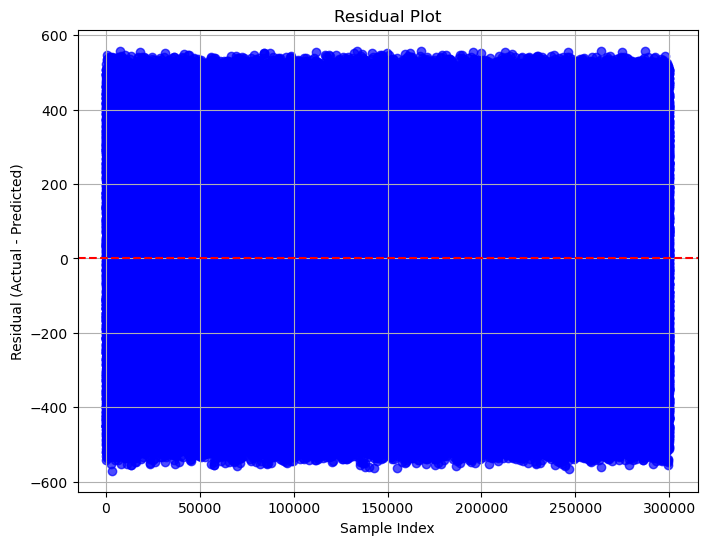

In [32]:

# Calculate residuals
residuals = [actual - predicted for actual, predicted in zip(y_test, test_pred)]

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0 for reference
plt.title('Residual Plot')
plt.xlabel('Sample Index')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()


In [36]:
def calculate_mape(actual, predicted):
    """
    Calculate Mean Absolute Percentage Error (MAPE) between actual and predicted values.

    Parameters:
    actual : array-like, shape (n_samples,)
        Array containing actual values.
    predicted : array-like, shape (n_samples,)
        Array containing predicted values.

    Returns:
    mape : float
        Mean Absolute Percentage Error (MAPE) value.
    """
    # Ensure actual and predicted arrays have the same length
    if len(actual) != len(predicted):
        raise ValueError("Length of actual and predicted arrays must be the same.")

    # Calculate absolute percentage error for each sample
    ape = abs((actual - predicted) / actual)

    # Calculate mean absolute percentage error
    mape = ape.mean() * 100

    return mape

# usage:
mape = calculate_mape(y_test, test_pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 1.62%


In [47]:
#Dummy variables
cat_cols
x1=pd.get_dummies(df['gender'],drop_first=True)
x2=pd.get_dummies(df['smoker'],drop_first=True)
x3=pd.get_dummies(df['region'],drop_first=True)
x4=pd.get_dummies(df['medical_history'],drop_first=True)
x5=pd.get_dummies(df['family_medical_history'],drop_first=True)
x6=pd.get_dummies(df['exercise_frequency'],drop_first=True)
x7=pd.get_dummies(df['occupation'],drop_first=True)
x8=pd.get_dummies(df['coverage_level'],drop_first=True)

In [48]:
X_new=X.copy()
X_new=pd.concat([X_new,x1,x2,x3,x4,x5,x6,x7,x8],axis=1)

In [49]:
for i in cat_cols:
    X_new.drop(i,axis=1,inplace=True)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [51]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
r2_score(y_test,pred)

0.9957029537538556

In [52]:
def calculate_mape(actual, predicted):
    """
    Calculate Mean Absolute Percentage Error (MAPE) between actual and predicted values.

    Parameters:
    actual : array-like, shape (n_samples,)
        Array containing actual values.
    predicted : array-like, shape (n_samples,)
        Array containing predicted values.

    Returns:
    mape : float
        Mean Absolute Percentage Error (MAPE) value.
    """
    # Ensure actual and predicted arrays have the same length
    if len(actual) != len(predicted):
        raise ValueError("Length of actual and predicted arrays must be the same.")

    # Calculate absolute percentage error for each sample
    ape = abs((actual - predicted) / actual)

    # Calculate mean absolute percentage error
    mape = ape.mean() * 100

    return mape

# usage:
mape = calculate_mape(y_test, pred)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))


Mean Absolute Percentage Error (MAPE): 1.62%


In [209]:
all_cols=['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
num_pipeline=Pipeline(
                steps=[
                    ("Imputer",SimpleImputer(strategy='mean'))
                ]
            )
cat_pipeline=Pipeline(
                steps=[
                    ('TargetEncoder',TargetEncoder(cols=cat_cols)),
                ]
            )
stan_pipeline=Pipeline(
                steps=[
                    ("Standardization",StandardScaler(with_mean=False))
                ]
            )
preprocessor=ColumnTransformer([
                ('num_pipeline',num_pipeline,num_cols),
                ('cat_pipeline',cat_pipeline,cat_cols),
            ])

X_train_scaled=preprocessor.fit_transform(X_train,y_train)
X_test_scaled=preprocessor.fit_transform(X_test,y_test)

In [212]:
ColumnTransformer([
    ('stan_pipeline',stan_pipeline)
]).fit_transform()

array([[6.10000000e+01, 2.39200000e+01, 1.00000000e+00, ...,
        1.58672908e+04, 1.77348720e+04, 1.43971166e+04],
       [4.60000000e+01, 2.94500000e+01, 1.00000000e+00, ...,
        1.78563146e+04, 1.72302337e+04, 1.94018552e+04],
       [4.90000000e+01, 3.79500000e+01, 1.00000000e+00, ...,
        1.58672908e+04, 1.77348720e+04, 1.94018552e+04],
       ...,
       [6.50000000e+01, 2.90400000e+01, 1.00000000e+00, ...,
        1.68660577e+04, 1.62379102e+04, 1.64141786e+04],
       [4.20000000e+01, 3.47600000e+01, 2.00000000e+00, ...,
        1.58672908e+04, 1.77348720e+04, 1.64141786e+04],
       [2.50000000e+01, 2.58600000e+01, 3.00000000e+00, ...,
        1.63408807e+04, 1.62379102e+04, 1.94018552e+04]])

In [199]:
lr.fit(X_train_scaled,y_train)
pred=lr.predict(X_test_scaled)
r2_score(y_test,pred)

0.8317490963637093

In [128]:
#StandardScaler with Target encoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
for i in cat_cols:
    X_train[i]=TargetEncoder(cols=i).fit_transform(X_train[i],y_train)
    X_test[i]=TargetEncoder(cols=i).fit_transform(X_test[i],y_test)

scaler=StandardScaler()
for i in X_train.columns:
    X_train[i]=scaler.fit_transform(X_train[[i]])
    X_test[i]=scaler.fit_transform(X_test[[i]])

In [129]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
pred=rfr.predict(X_test)
r2_score(y_test,pred)

0.9934952604565764

In [130]:
dtree=DecisionTreeRegressor()
dtree.fit(X_train,y_train)
pred=dtree.predict(X_test)
r2_score(y_test,pred)

0.9862269823326211

In [131]:
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
cat_transformer=Pipeline(steps=[
    ('target_encoder', TargetEncoder(cols=cat_cols)),
    ("StandardScaler",StandardScaler(with_mean=False))
])
'''num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])'''

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols),
  #      ('num', num_transformer, num_cols)
    ])

In [173]:
preprocessor.fit_transform(X_train,y_train)

array([[33.95863216,  7.6808103 , 52.90146197, ..., 21.47913618,
        22.47347896,  7.00271497],
       [33.95863216,  7.6808103 , 55.17286798, ..., 24.17162562,
        21.83400569,  9.43700504],
       [31.95863184,  7.6808103 , 55.17286798, ..., 21.47913618,
        22.47347896,  9.43700504],
       ...,
       [33.95863216,  5.6808103 , 52.90146197, ..., 22.83114076,
        20.57654168,  7.98380798],
       [33.95863216,  5.6808103 , 53.5383337 , ..., 21.47913618,
        22.47347896,  7.98380798],
       [31.95863184,  7.6808103 , 52.57972672, ..., 22.12022247,
        20.57654168,  9.43700504]])

In [179]:
np.c_[preprocessor.fit_transform(X_test,y_test),np.array(y_test)]

array([[3.54151292e+01, 5.72168997e+00, 5.54199916e+01, ...,
        2.25915502e+01, 7.96570457e+00, 1.38893331e+04],
       [3.54151292e+01, 7.72169062e+00, 5.69611971e+01, ...,
        2.19632617e+01, 7.96570457e+00, 2.07480199e+04],
       [3.34151288e+01, 5.72168997e+00, 5.44041147e+01, ...,
        2.06808885e+01, 9.41905111e+00, 1.73292831e+04],
       ...,
       [3.54151292e+01, 7.72169062e+00, 5.46418557e+01, ...,
        2.19632617e+01, 6.98322554e+00, 2.08065678e+04],
       [3.34151288e+01, 7.72169062e+00, 5.69611971e+01, ...,
        2.19632617e+01, 9.41905111e+00, 1.86795551e+04],
       [3.34151288e+01, 5.72168997e+00, 5.44041147e+01, ...,
        2.19632617e+01, 7.96570457e+00, 1.52196131e+04]])

In [180]:
np.c_[preprocessor.fit_transform(X_train,y_train),np.array(y_train)]

array([[3.39586322e+01, 7.68081030e+00, 5.29014620e+01, ...,
        2.24734790e+01, 7.00271497e+00, 1.76910880e+04],
       [3.39586322e+01, 7.68081030e+00, 5.51728680e+01, ...,
        2.18340057e+01, 9.43700504e+00, 2.20827759e+04],
       [3.19586318e+01, 7.68081030e+00, 5.51728680e+01, ...,
        2.24734790e+01, 9.43700504e+00, 2.49003235e+04],
       ...,
       [3.39586322e+01, 5.68081030e+00, 5.29014620e+01, ...,
        2.05765417e+01, 7.98380798e+00, 1.30322842e+04],
       [3.39586322e+01, 5.68081030e+00, 5.35383337e+01, ...,
        2.24734790e+01, 7.98380798e+00, 1.13608839e+04],
       [3.19586318e+01, 7.68081030e+00, 5.25797267e+01, ...,
        2.05765417e+01, 9.43700504e+00, 1.89841946e+04]])